# 0.EDA

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

mpg = sns.load_dataset("mpg")
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


## a) Initial EDA

In [2]:
mpg.info()
mpg.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


### missing values

In [3]:
mpg.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

### horsepower contains missing values -> fill with median

In [4]:
mpg["horsepower"] = mpg["horsepower"].fillna(mpg["horsepower"].median())

## b) Describe relevant columns

In [5]:
mpg[["mpg", "horsepower", "weight", "acceleration", "displacement"]].describe()

,mpg,horsepower,weight,acceleration,displacement
count,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,104.304020,2970.424623,15.568090,193.425879
std,7.815984,38.222625,846.841774,2.757689,104.269838
min,9.000000,46.000000,1613.000000,8.000000,68.000000
25%,17.500000,76.000000,2223.750000,13.825000,104.250000
50%,23.000000,93.500000,2803.500000,15.500000,148.500000
75%,29.000000,125.000000,3608.000000,17.175000,262.000000
max,46.600000,230.000000,5140.000000,24.800000,455.000000


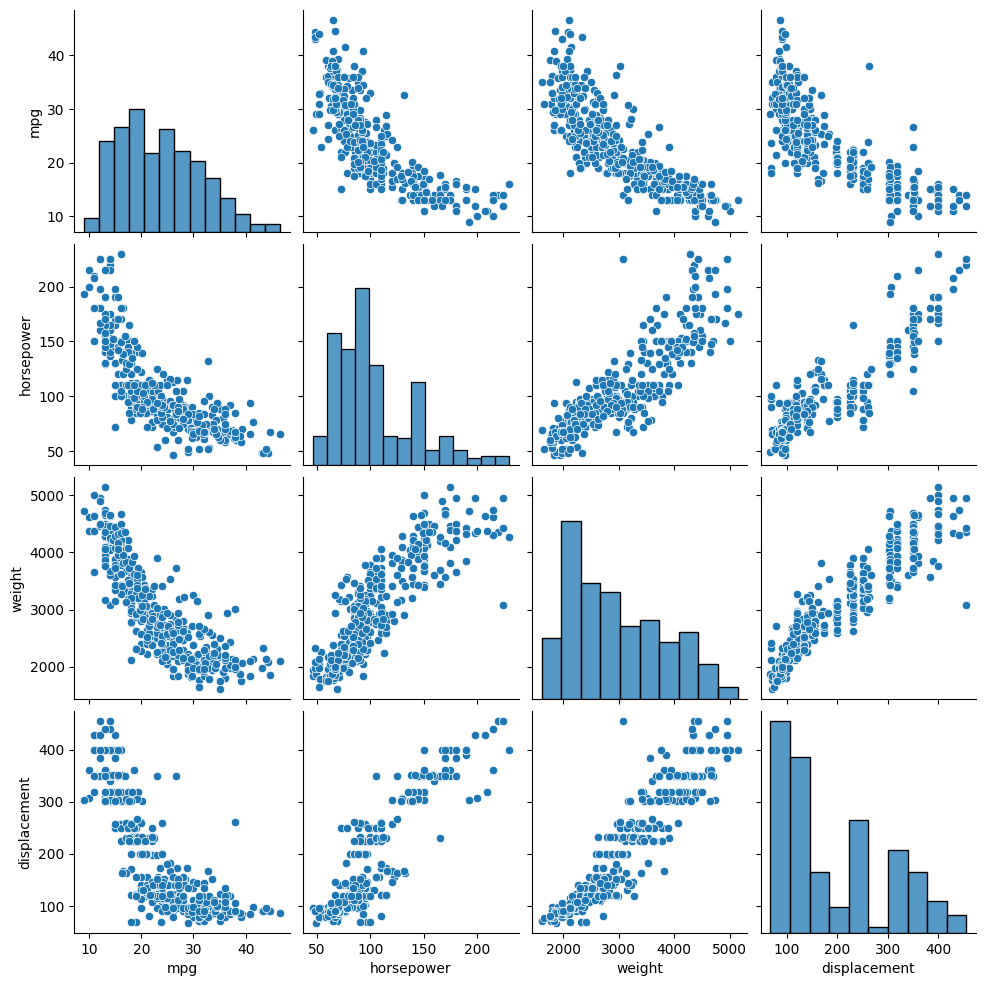

In [6]:
sns.pairplot(mpg[["mpg", "horsepower", "weight", "displacement"]])
plt.show()

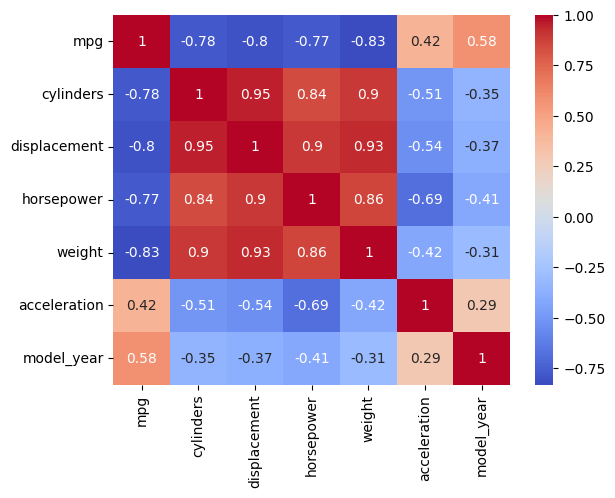

In [7]:
corr = mpg.select_dtypes(include="number").corr()

sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.show()

For correlation analysis, only numerical features were selected since correlation is only defined for numerical variables.

### Feature cleaning / Preprocessing

In [8]:
mpg_model = mpg.copy()

# Columns that should not be used in the model
mpg_model = mpg_model.drop(columns=["name", "origin"], errors="ignore")

X = mpg_model.drop("mpg", axis=1)
y = mpg_model["mpg"]

# 1. Linear regression on mpg dataset

## a) Train/Test split

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

## b) Training & Evaluation Function

In [10]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
import numpy as np


def train_and_evaluate(X_train, X_test, y_train, y_test, model):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    mae = mean_absolute_error(y_test, preds)
    mse = mean_squared_error(y_test, preds)
    rmse = np.sqrt(mse)

    return mae, mse, rmse

In [11]:
lr = LinearRegression()
mae, mse, rmse = train_and_evaluate(X_train, X_test, y_train, y_test, lr)

mae, mse, rmse

(2.4667808004520326, 9.440068465263378, np.float64(3.0724694408998405))

## Result comparison

In [12]:
results = [["LinearRegression", mae, mse, rmse]]

results_df = pd.DataFrame(results, columns=["model", "mae", "mse", "rmse"])
results_df


,model,mae,mse,rmse
0,LinearRegression,2.466781,9.440068,3.072469


The linear regression model was trained on the mpg dataset and evaluated using MAE, MSE and RMSE. The results show that the model captures the main relationship between the input features and mpg, with RMSE representing the average prediction error in miles per gallon.